<a href="https://colab.research.google.com/github/huavinhkhang0405/TriTueNhanTao/blob/main/BaoCao_THTTNT_Buoi4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BÁO CÁO TUẦN 4

---



*   Họ tên: Hứa Vĩnh Khang
*   MSSV: 2001230385

---





### THUẬT TOÁN TÔ MÀU ĐỒ THỊ

---



## 1. Định nghĩa và mục đích
---


- **Khái niệm**: Tô màu đồ thị là việc gán nhãn (màu) cho các thành phần của một đồ thị (các đỉnh) sao cho thỏa mãn các điều kiện ràng buộc nhất định.
- **Quy tắc**: Hai đỉnh kề nhau bắt buộc phải khác màu.
- **Mục tiêu**: Tìm số lượng màu tối thiểu để thỏa mãn quy tắc trên

---






## 2. Cơ chế hoạt động

---
Cơ chế hoạt động thường dựa trên các phương pháp Tham lam (Greedy) hoặc Heuristic để tìm ra lời giải chấp nhận được (gần tối ưu).
1. Chọn đỉnh có bậc lớn nhất tô màu i.
2. Hạ bậc (Đỉnh đã tô màu: bậc = 0; Những đỉnh có liên hệ: bậc := bậc – 1)
1. Những đỉnh có liên hệ: bậc := bậc – 1
Bước 3: Đánh dấu các đỉnh liên hệ và cấm tô màu i.



##3. Ví dụ minh họa

---



Khai báo các thư viện sử dụng

---



In [60]:
import matplotlib.pyplot as plt # Thư viện dùng để vẽ đồ thị
import networkx as nx # Thư viện dùng để tính toán và thao tác trên đồ thị

def loadGraph(file):
  matrix = []
  try:
        with open(file, 'r', encoding='utf-8') as f:
            for line in f:
                # 1. Làm sạch
                clean_line = line.replace('[', ' ').replace(']', ' ').replace(',', ' ')

                # 2. Chuyển thành list số nguyên (đây là 1 hàng của ma trận)
                row_matrix = [int(x) for x in clean_line.split()]

                # Nếu dòng rỗng thì bỏ qua
                if not row_matrix:
                    continue

                # 3. Chuyển từ Hàng Ma trận sang Danh sách kề
                neighbors = []
                for node_index, val in enumerate(row_matrix):
                    if val == 1:
                        neighbors.append(node_index)

                matrix.append(neighbors)

        return matrix

  except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file tại {file}")
        return []
  except Exception as e:
        print(f"Lỗi đọc file: {e}")
        return []

def graph_coloring_algorithm(G, nodes):
  t_ = {}
  for i in range(len(G)):
      t_[nodes[i]] = i # Maps node character to its index
  degree = []
  for i in range(len(G)):
      degree.append(len(G[i])) # Calculates degree for each node

  initial_colors = ['red', 'green', 'blue', 'orange', 'yellow', 'black']

  colorDict = {}
  for i in range(len(G)):
      colorDict[nodes[i]] = list(initial_colors) # Each node can take any initial color

  nodes_with_degrees = []
  for i in range(len(G)):
      nodes_with_degrees.append((degree[i], i))

  nodes_with_degrees.sort(key=lambda x: x[0], reverse=True) # Sort by degree descending

  sortedNode_chars = []
  for _, node_idx in nodes_with_degrees:
      sortedNode_chars.append(nodes[node_idx]) # Get node characters in sorted order

  theSolution = {} # Stores final color for each node character
  final_colors_indices = [0] * len(G) # Stores index of assigned color for each node index

  local_palette_map = {color: idx for idx, color in enumerate(initial_colors)} # Map color name to index

  print("\n--- Bắt đầu Thuật toán Tô màu Đồ thị ---")
  for n_char in sortedNode_chars: # Process nodes in sorted order
      n_idx = t_[n_char] # Get index of current node

      print(f"\nĐang xử lý đỉnh: {n_char} (bậc: {degree[n_idx]}) \n  Màu khả dụng cho {n_char}: {colorDict[n_char]}")

      assigned_color = None
      if colorDict[n_char]: # Check if there are available colors
          assigned_color = colorDict[n_char][0] # Take the first available color
      else:
          print(f"Warning: Đỉnh {n_char} không thể tô màu với bảng màu hiện có. Gán màu mặc định 'black'.")
          assigned_color = 'black' # Fallback color

      theSolution[n_char] = assigned_color # Store the assigned color for the node char
      if assigned_color in local_palette_map:
          final_colors_indices[n_idx] = local_palette_map[assigned_color] # Store color index for the node index
      else:
          final_colors_indices[n_idx] = len(initial_colors) # If fallback, assign a new index

      print(f"  Gán màu '{assigned_color}' cho đỉnh {n_char}.")

      # Update neighbors' available colors
      for neighbor_idx in G[n_idx]: # Iterate through neighbors (represented by their indices)
          neighbor_char = nodes[neighbor_idx] # Get the neighbor's character
          # Only update if the neighbor hasn't been colored yet
          if neighbor_char not in theSolution:
              if assigned_color in colorDict[neighbor_char]: # If the assigned color is still available for the neighbor
                  colorDict[neighbor_char].remove(assigned_color) # Remove it
                  print(f"    Đỉnh kề {neighbor_char} không được dùng màu '{assigned_color}'. Màu khả dụng còn lại: {colorDict[neighbor_char]}")

  print("\n--- Kết thúc Thuật toán Tô màu Đồ thị ---")
  print("Kết quả tô màu cuối cùng (đỉnh: màu):")
  for node, color in theSolution.items():
      print(f"  {node}: {color}")

  return final_colors_indices

def draw_graph(graph_adj, colors_idx, nodes):
  palette = ['red', 'green', 'blue', 'orange', 'yellow', 'black']
  final_node_colors = []

  for i in range(len(graph_adj)):
        c_id = colors_idx[i]

        # Nếu màu vượt quá bảng màu thì quay vòng lại
        c_name = palette[c_id % len(palette)]
        final_node_colors.append(c_name)

  G_visual = nx.Graph()

  # Chuyển đổi từ Danh sách kề sang NetworkX Graph
  for u, neighbors in enumerate(graph_adj):
        for v in neighbors:
            if u < v: # Chỉ thêm cạnh 1 lần (tránh trùng lặp trong đồ thị vô hướng)
                G_visual.add_edge(nodes[u], nodes[v])
  plt.figure(figsize=(8, 6))

  # seed=42 giúp hình dáng đồ thị cố định, không bị nhảy lung tung mỗi lần chạy
  pos = nx.spring_layout(G_visual, seed=42)
  print(f" Màu sắc cuối cùng được chuyển đến NetworkX: {final_node_colors}") # Debugging line
  nx.draw(G_visual, pos,
            with_labels=True,
            node_color=final_node_colors, # Mảng màu đã chuẩn bị
            node_size=2000,
            font_color='white',
            font_weight='bold',
            edge_color='gray',
            width=1.5) # Độ dày cạnh

  plt.title("Kết quả Tô màu Đồ thị")
  plt.show()



---
Hàm load đồ thị (Dữ liệu file txt)

---



In [61]:
def loadGraph(file):
  matrix = []
  try:
        with open(file, 'r', encoding='utf-8') as f:
            for line in f:
                # 1. Làm sạch
                clean_line = line.replace('[', ' ').replace(']', ' ').replace(',', ' ')

                # 2. Chuyển thành list số nguyên (đây là 1 hàng của ma trận)
                row_matrix = [int(x) for x in clean_line.split()]

                # Nếu dòng rỗng thì bỏ qua
                if not row_matrix:
                    continue

                # 3. Chuyển từ Hàng Ma trận sang Danh sách kề
                neighbors = []
                for node_index, val in enumerate(row_matrix):
                    if val == 1:
                        neighbors.append(node_index)

                matrix.append(neighbors)

        return matrix

  except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file tại {file}")
        return []
  except Exception as e:
        print(f"Lỗi đọc file: {e}")
        return []



---

Tạo đồ thị (Chuyển sang dạng txt)

---



In [62]:
G = [[ 0, 1, 1, 0, 1, 0],
     [ 1, 0, 1, 1, 0, 1],
     [ 1, 1, 0, 1, 1, 0],
     [ 0, 1, 1, 0, 0, 1],
     [ 1, 0, 1, 0, 0, 1],
     [ 0, 1, 0, 1, 1, 0]]

# Lệnh ghi ra file txt
with open('graph.txt', 'w', encoding='utf-8') as f:
    for row in G:
        f.write(str(row) + '\n')

print("Đã tạo file graph.txt thành công!")

Đã tạo file graph.txt thành công!




---

Thuật toán tô màu đồ thị

---



In [63]:
def graph_coloring_algorithm(G, nodes):
  nodes_with_degrees = []
  for i in range(len(G)):
        nodes_with_degrees.append((len(G[i]), i))

    # Sắp xếp đỉnh có bậc cao nhất tô trước (Welsh-Powell heuristic)
  nodes_with_degrees.sort(key=lambda x: x[0], reverse=True)

  sorted_node_indices = [x[1] for x in nodes_with_degrees]

    # Bảng màu
  palette = ['red', 'green', 'blue', 'orange', 'yellow', 'black']

    # Mảng lưu kết quả màu của từng đỉnh (khởi tạo None)
    # final_colors_indices[i] sẽ lưu index màu của đỉnh i
  final_colors_indices = [-1] * len(G)

    # Bước 2: Duyệt và tô màu
  for n_idx in sorted_node_indices:

        # Lấy tập hợp các màu mà hàng xóm ĐÃ DÙNG
        neighbor_colors_used = set()

        # Duyệt qua các hàng xóm trong danh sách kề
        for neighbor_idx in G[n_idx]:
            if final_colors_indices[neighbor_idx] != -1:
                neighbor_colors_used.add(final_colors_indices[neighbor_idx])

        for i in range(len(G)):
            if n_idx in G[i]: # Nếu đỉnh i có nối tới n_idx
                 if final_colors_indices[i] != -1:
                    neighbor_colors_used.add(final_colors_indices[i])

        # Tìm màu đầu tiên trong bảng màu KHÔNG bị trùng
        chosen_color_idx = 0
        for color_idx in range(len(palette)):
            if color_idx not in neighbor_colors_used:
                chosen_color_idx = color_idx
                break

        # Gán màu
        final_colors_indices[n_idx] = chosen_color_idx

  return final_colors_indices



---

Hàm vẽ đồ thị

---



In [64]:
def draw_graph(graph_adj, colors_idx, nodes):
    palette = ['red', 'green', 'blue', 'orange', 'yellow', 'black']
    final_node_colors = []

    # Tạo danh sách màu theo đúng thứ tự của index 0, 1, 2...
    for i in range(len(graph_adj)):
        c_id = colors_idx[i]
        c_name = palette[c_id % len(palette)]
        final_node_colors.append(c_name)

    G_visual = nx.Graph()

    # Tạo đồ thị
    for u, neighbors in enumerate(graph_adj):
        for v in neighbors:
            if u < v:
                G_visual.add_edge(nodes[u], nodes[v])

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G_visual, seed=42)

    nx.draw(G_visual, pos,
            nodelist=nodes,
            with_labels=True,
            node_color=final_node_colors,
            node_size=2000,
            font_color='white',
            font_weight='bold',
            edge_color='gray',
            width=1.5)

    plt.title("Kết quả Tô màu Đồ thị")
    plt.show()



---
Hàm thực thi chương trình chính
---



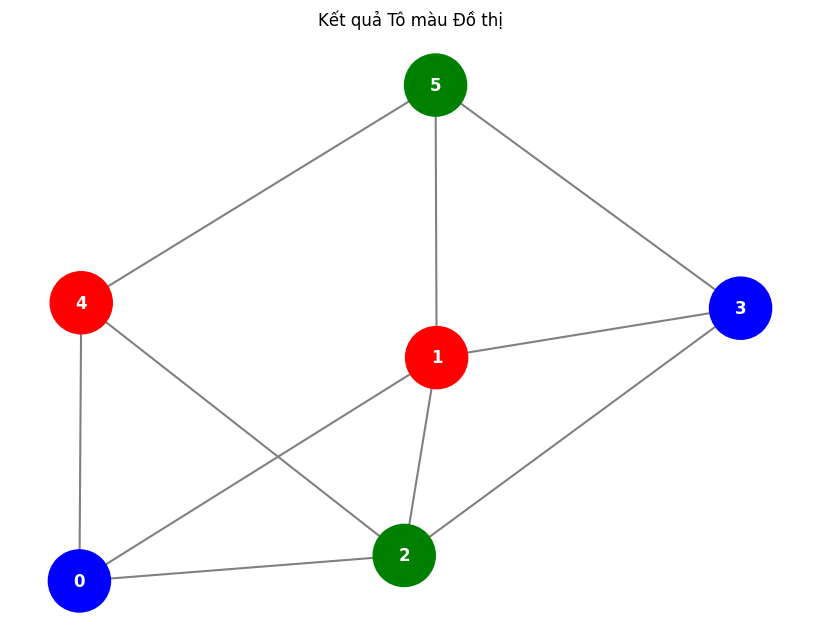

In [65]:
def main():
  graph_data_path = 'graph.txt'

  # Load dữ liệu từ file graph.txt
  graph_data = loadGraph(graph_data_path)
  if not graph_data:
      print("Lỗi đọc file!")
      return

  # Xác định số lượng đỉnh từ dữ liệu đồ thị
  num_nodes = len(graph_data)
  # Tạo danh sách nhãn đỉnh dựa trên số lượng đỉnh
  nodes = [str(i) for i in range(num_nodes)]

  # Chạy thuật toán tô màu
  colors_idx = graph_coloring_algorithm(graph_data, nodes)

  # Vẽ đồ thị
  draw_graph(graph_data, colors_idx, nodes)

if __name__ == '__main__':
  main()

## Tạo đồ thị với đỉnh tự động

In [67]:
import matplotlib.pyplot as plt
import networkx as nx
import time
import random

# --- 1. CÁC HÀM XỬ LÝ DỮ LIỆU ĐỒ THỊ ---

def loadGraph(file):
    matrix = []
    try:
        with open(file, 'r', encoding='utf-8') as f:
            for line in f:
                clean_line = line.replace('[', ' ').replace(']', ' ').replace(',', ' ')
                row_matrix = [int(x) for x in clean_line.split()]
                if not row_matrix: continue

                neighbors = []
                for node_index, val in enumerate(row_matrix):
                    if val == 1:
                        neighbors.append(node_index)
                matrix.append(neighbors)
        return matrix
    except Exception as e:
        print(f"Lỗi đọc file: {e}")
        return []

def create_graph_from_input():
    # (Giữ nguyên logic nhập tay của bạn)
    while True:
        try:
            num_nodes = int(input("Nhập số lượng đỉnh: "))
            if num_nodes > 0: break
        except ValueError: pass

    graph_adj = []
    for i in range(num_nodes):
        while True:
            try:
                neighbor_input = input(f"Đỉnh kề của {i} (cách nhau bởi dấu cách): ")
                neighbors = [int(n) for n in neighbor_input.split()] if neighbor_input.strip() else []
                graph_adj.append(list(set(neighbors)))
                break
            except ValueError: pass

    nodes = [str(i) for i in range(num_nodes)]
    return graph_adj, nodes

# --- [MỚI] HÀM SINH ĐỒ THỊ NGẪU NHIÊN ---
def create_random_graph():
    print("\n--- TẠO ĐỒ THỊ NGẪU NHIÊN ---")
    while True:
        try:
            num_nodes = int(input("1. Nhập số lượng đỉnh: "))
            if num_nodes > 0: break
        except ValueError: print("Vui lòng nhập số nguyên dương.")

    while True:
        try:
            prob = float(input("2. Nhập xác suất kết nối (0.0 đến 1.0, VD 0.4): "))
            if 0.0 <= prob <= 1.0: break
            print("Xác suất phải từ 0 đến 1.")
        except ValueError: print("Vui lòng nhập số thực.")

    # Tạo danh sách kề rỗng
    graph_adj = [[] for _ in range(num_nodes)]

    # Duyệt từng cặp đỉnh và tung đồng xu
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes): # Chỉ xét j > i để tránh trùng lặp cạnh
            if random.random() < prob:
                # Nếu trúng xác suất, thêm cạnh cho cả 2 chiều (vô hướng)
                graph_adj[i].append(j)
                graph_adj[j].append(i)

    nodes = [str(i) for i in range(num_nodes)]
    print(f"-> Đã tạo xong đồ thị ngẫu nhiên {num_nodes} đỉnh.")
    return graph_adj, nodes

# --- 2. THUẬT TOÁN TÔ MÀU (GIỮ NGUYÊN LOGIC CỦA BẠN) ---

def graph_coloring_algorithm(G, nodes):
    # Map node sang index
    t_ = {node: i for i, node in enumerate(nodes)}

    # Tính bậc
    degree = [len(G[i]) for i in range(len(G))]

    initial_colors = ['red', 'green', 'blue', 'orange', 'yellow', 'black', 'purple', 'cyan']

    # Khởi tạo màu khả dụng
    colorDict = {node: list(initial_colors) for node in nodes}

    # Sắp xếp theo bậc giảm dần
    nodes_with_degrees = sorted([(degree[i], i) for i in range(len(G))], key=lambda x: x[0], reverse=True)
    sortedNode_chars = [nodes[idx] for _, idx in nodes_with_degrees]

    theSolution = {}
    final_colors_indices = [-1] * len(G)
    coloring_steps_history = []
    local_palette_map = {color: idx for idx, color in enumerate(initial_colors)}

    print("\n--- Bắt đầu Tô màu ---")
    for n_char in sortedNode_chars:
        n_idx = t_[n_char]

        # Chọn màu đầu tiên khả dụng
        assigned_color = colorDict[n_char][0] if colorDict[n_char] else 'black'

        theSolution[n_char] = assigned_color

        if assigned_color in local_palette_map:
            final_colors_indices[n_idx] = local_palette_map[assigned_color]
        else:
            final_colors_indices[n_idx] = len(initial_colors) # Màu fallback

        # Lưu bước
        coloring_steps_history.append(list(final_colors_indices))

        # Cập nhật hàng xóm (Forward Checking)
        for neighbor_idx in G[n_idx]:
            neighbor_char = nodes[neighbor_idx]
            if neighbor_char not in theSolution: # Nếu chưa được tô
                if assigned_color in colorDict[neighbor_char]:
                    colorDict[neighbor_char].remove(assigned_color)

    return coloring_steps_history

# --- 3. HÀM VẼ (ĐÃ SỬA LỖI NODELIST) ---

def draw_graph(graph_adj, coloring_steps_history, nodes):
    palette = ['red', 'green', 'blue', 'orange', 'yellow', 'black', 'purple', 'cyan']

    G_visual = nx.Graph()
    for u, neighbors in enumerate(graph_adj):
        for v in neighbors:
            if u < v:
                G_visual.add_edge(nodes[u], nodes[v])

    # Tính toán layout 1 lần để các đỉnh không bị nhảy loạn xạ giữa các bước
    pos = nx.spring_layout(G_visual, seed=42)

    # Vòng lặp vẽ từng bước
    for step, current_colors_idx in enumerate(coloring_steps_history):
        final_node_colors = []
        for i in range(len(graph_adj)):
            c_id = current_colors_idx[i]
            if c_id == -1:
                final_node_colors.append('lightgray')
            else:
                final_node_colors.append(palette[c_id % len(palette)])

        plt.figure(figsize=(8, 6))

        # QUAN TRỌNG: Thêm nodelist=nodes để đảm bảo màu tô đúng người
        nx.draw(G_visual, pos,
                nodelist=nodes,
                with_labels=True,
                node_color=final_node_colors,
                node_size=1500,
                font_color='white',
                font_weight='bold',
                edge_color='gray')

        plt.title(f"Bước {step + 1}")
        plt.show(block=False)
        plt.pause(1) # Dùng pause thay vì sleep để tương thích tốt hơn với matplotlib backend
        plt.close()

    # Vẽ kết quả cuối cùng (giữ cửa sổ)
    if coloring_steps_history:
        final_idx = coloring_steps_history[-1]
        final_colors = [palette[idx % len(palette)] if idx != -1 else 'lightgray' for idx in final_idx]

        plt.figure(figsize=(8, 6))
        nx.draw(G_visual, pos,
                nodelist=nodes, # <--- Fix quan trọng
                with_labels=True,
                node_color=final_colors,
                node_size=1500,
                font_color='white',
                font_weight='bold')
        plt.title("Kết quả cuối cùng")
        plt.show()



=== MENU ===
1. Đọc từ file graph.txt
2. Nhập tay từng đỉnh
3. TẠO NGẪU NHIÊN (Tự động)
Chọn (1-3): 3

--- TẠO ĐỒ THỊ NGẪU NHIÊN ---
1. Nhập số lượng đỉnh: 5
2. Nhập xác suất kết nối (0.0 đến 1.0, VD 0.4): 1
-> Đã tạo xong đồ thị ngẫu nhiên 5 đỉnh.

--- Bắt đầu Tô màu ---


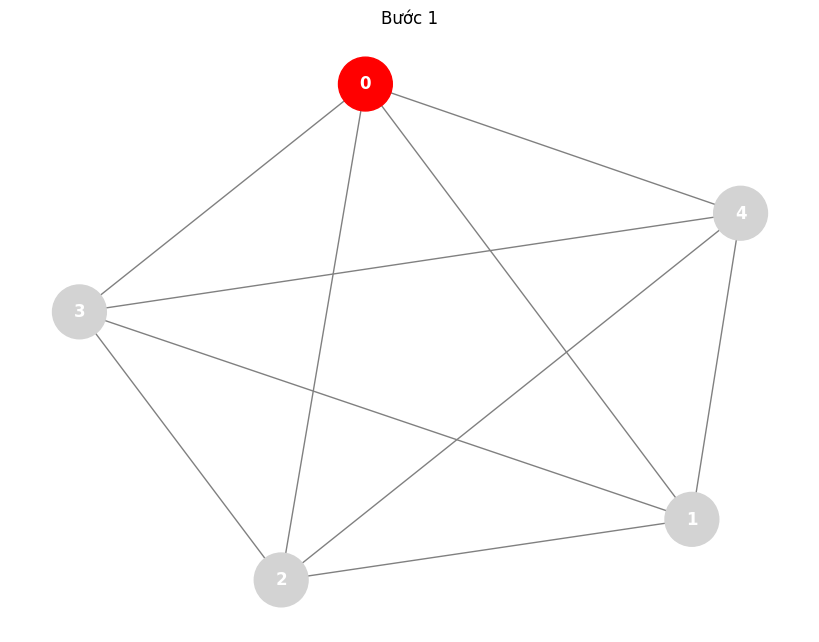

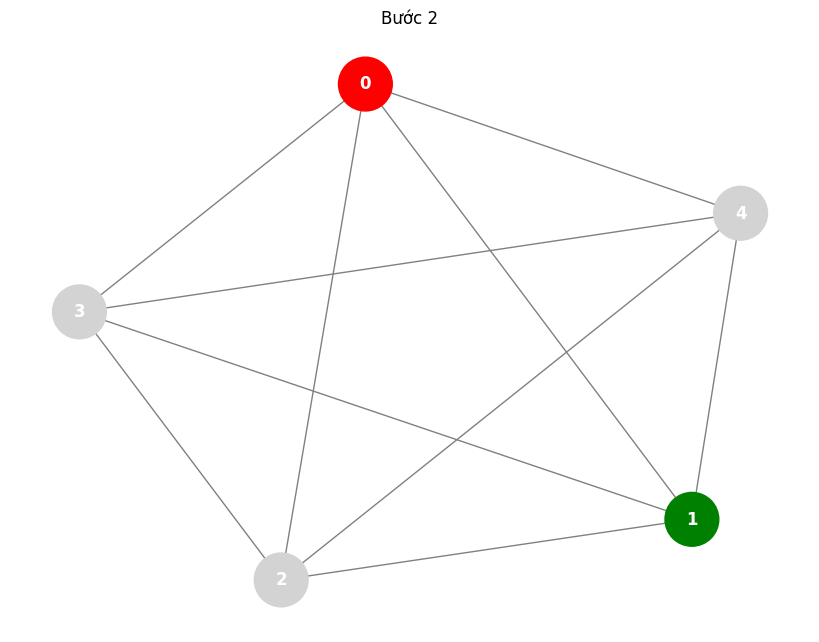

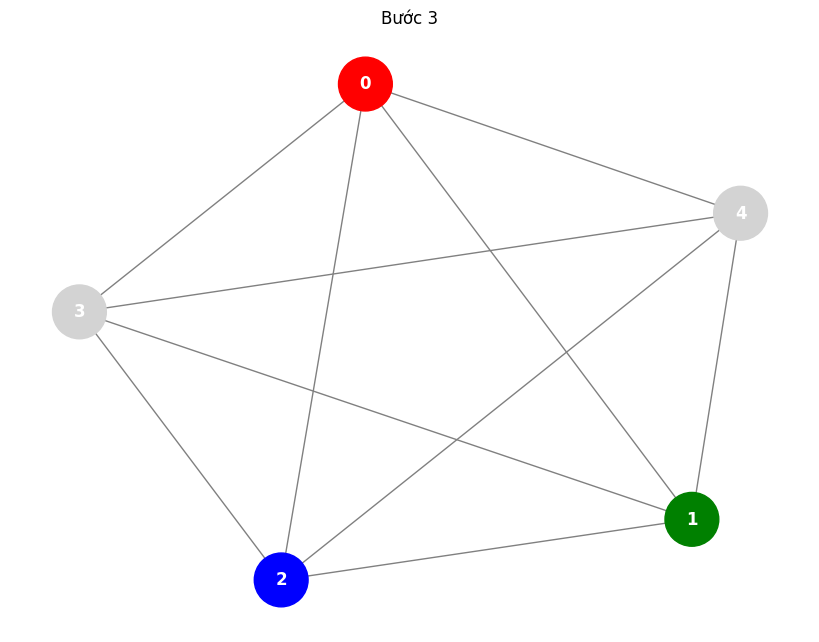

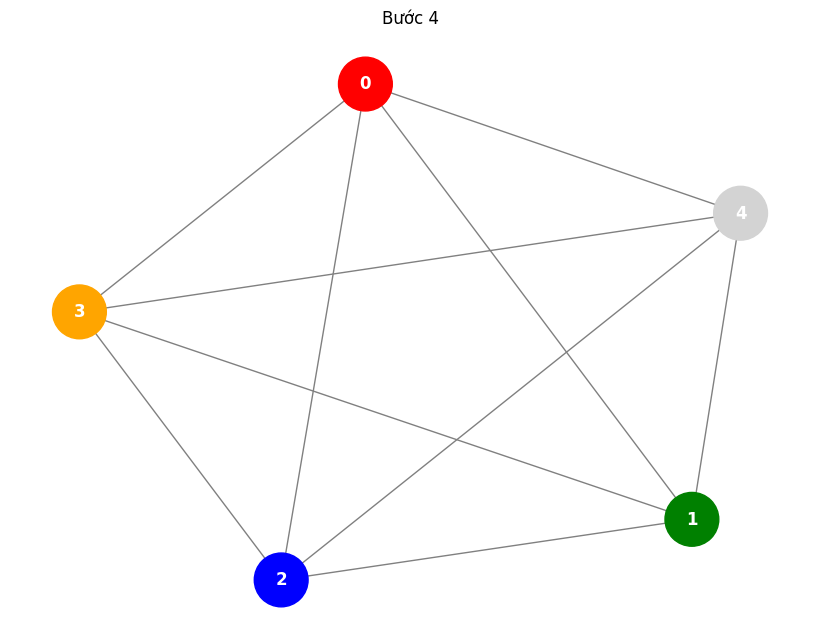

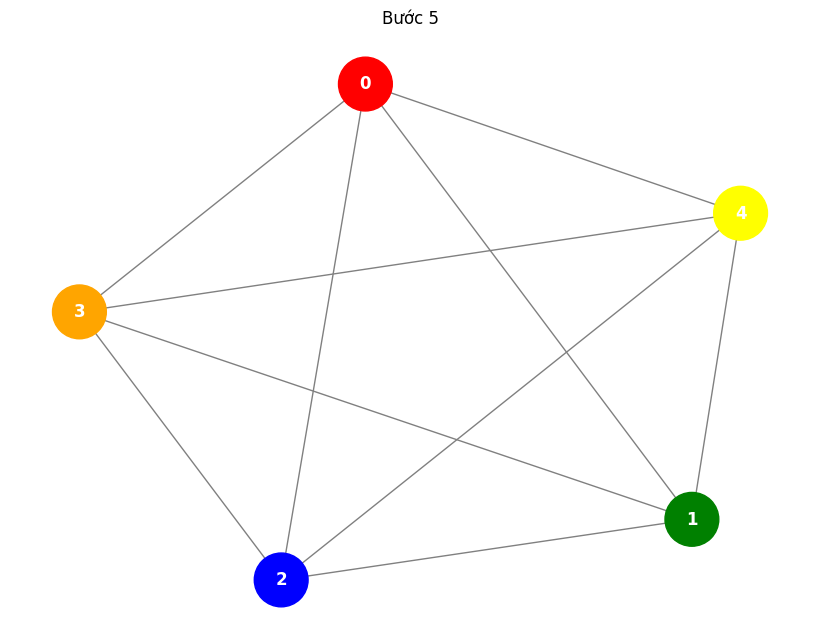

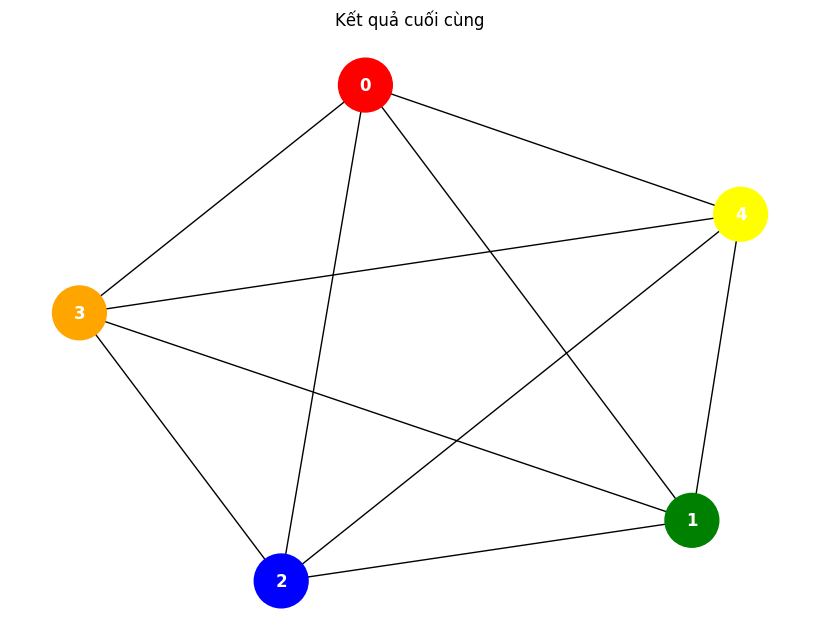

In [69]:
# --- 4. MAIN ---

def main():
    graph_data = []
    nodes = []

    while True:
        print("\n=== MENU ===")
        print("1. Đọc từ file graph.txt")
        print("2. Nhập tay từng đỉnh")
        print("3. TẠO NGẪU NHIÊN (Tự động)") # <--- Mục mới
        choice = input("Chọn (1-3): ")

        if choice == '1':
            graph_data = loadGraph('graph.txt')
            if graph_data:
                nodes = [str(i) for i in range(len(graph_data))]
                break
        elif choice == '2':
            graph_data, nodes = create_graph_from_input()
            if graph_data: break
        elif choice == '3':
            # Gọi hàm sinh ngẫu nhiên
            graph_data, nodes = create_random_graph()
            if graph_data: break
        else:
            print("Lựa chọn không hợp lệ.")

    if not graph_data: return

    # Chạy thuật toán
    steps = graph_coloring_algorithm(graph_data, nodes)

    # Vẽ
    draw_graph(graph_data, steps, nodes)

if __name__ == '__main__':
    main()